In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### 1. Read the dataset to python environment

In [2]:
data=pd.read_excel("C:/Users/ASUS/Desktop/DATA SCIENCE/Assignments/Assignment 7/iris.xls")
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### 2. Do the necessary pre-processing steps

In [4]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [5]:
data.shape

(150, 5)

In [6]:
corr_matrix=data.corr()

<AxesSubplot:>

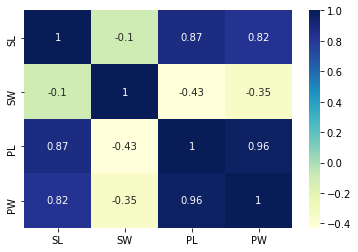

In [7]:
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')

In [8]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

D:\JEEVAN DOC\softwares\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

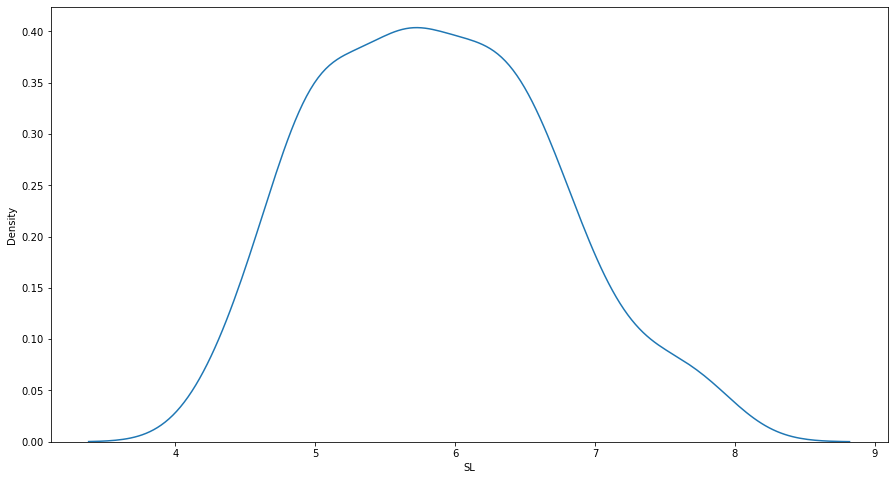

In [9]:
fig, ax = plt.subplots(figsize=(15,8))
sns.distplot(data['SL'] , kde = True , hist = False);
plt.show

D:\JEEVAN DOC\softwares\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

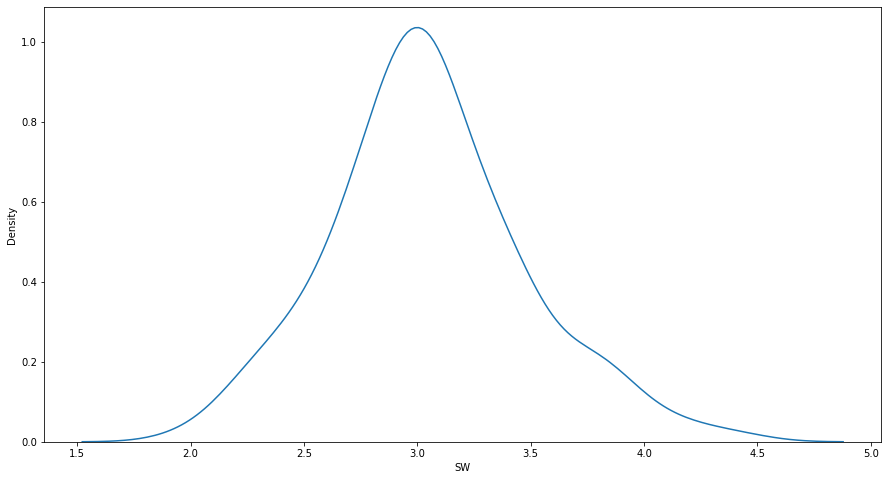

In [10]:
fig, ax = plt.subplots(figsize=(15,8))
sns.distplot(data['SW'] , kde = True , hist = False);
plt.show

D:\JEEVAN DOC\softwares\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

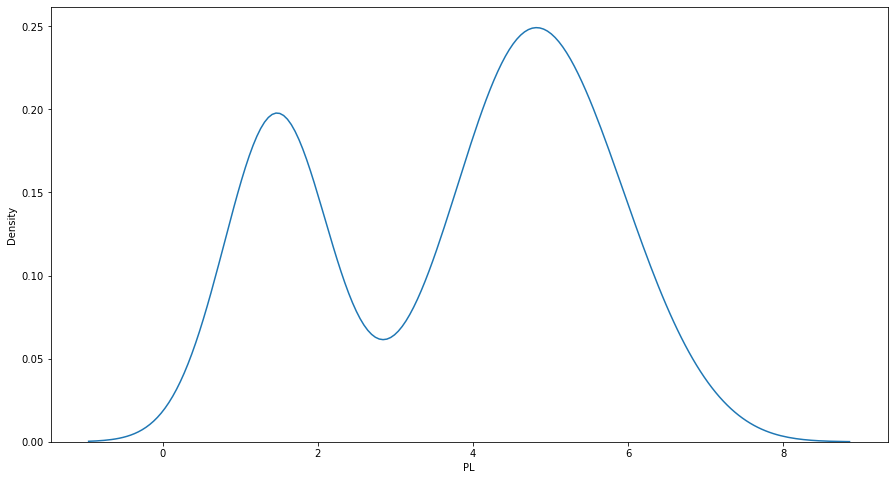

In [11]:
fig, ax = plt.subplots(figsize=(15,8))
sns.distplot(data['PL'] , kde = True , hist = False);
plt.show

### As the distributions are normal we can replace these missing values in SL,SW and PL columns by mean values



In [12]:
for i in['SL','SW','PL']:
    data[i]=data[i].fillna(data[i].mean())

In [13]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

### Label Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
data['Classification']=label_enc.fit_transform(data['Classification'])

In [15]:
data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


In [16]:
data.Classification.nunique()

3

### Doing Min Max scaling

In [17]:
data.describe()

,SL,SW,PL,PW,Classification
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667,1.000000
std,0.808480,0.421884,1.725479,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.200000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.200000,1.300000,1.000000
75%,6.400000,3.275000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [18]:
x=data.drop('Classification',axis=1)
x

,SL,SW,PL,PW
0,5.100000,3.5,1.40000,0.2
1,4.900000,3.0,1.40000,0.2
2,5.855944,3.2,1.30000,0.2
3,4.600000,3.1,1.50000,0.2
4,5.000000,3.6,1.40000,0.2
...,...,...,...,...
145,6.700000,3.0,5.20000,2.3
146,6.300000,2.5,5.00000,1.9
147,6.500000,3.0,3.75625,2.0
148,6.200000,3.4,5.40000,2.3


In [19]:
y=data['Classification']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Classification, Length: 150, dtype: int32

In [20]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler(feature_range=(0,1))
x=min_max.fit_transform(x)

In [21]:
type(x)

numpy.ndarray

In [22]:
x=pd.DataFrame(x)

In [23]:
type(x)

pandas.core.frame.DataFrame

In [24]:
x.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,0.432207,0.437211,0.467161,0.457778
std,0.224578,0.175785,0.292454,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.542373,0.500000
75%,0.583333,0.531250,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [25]:
x.columns=['SL','SW', 'PL', 'PW']
x.head()

,SL,SW,PL,PW
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.432207,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [26]:
x.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,0.432207,0.437211,0.467161,0.457778
std,0.224578,0.175785,0.292454,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.542373,0.500000
75%,0.583333,0.531250,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


### 3. Find out which classification model gives the best result (try all the classification algorithms discussed in the session)

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

### Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model=log_model.fit(x_train,y_train)

In [82]:
y_pred=log_model.predict(x_test)

In [83]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [84]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [85]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [93]:
print('Accuracy:',accuracy_score(y_test,y_pred))


Accuracy: 1.0


In [92]:
print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00



### K Nearest Neighbor

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(x_train,y_train)
    y_pred_knn=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred_knn)
    metric_k.append(acc)

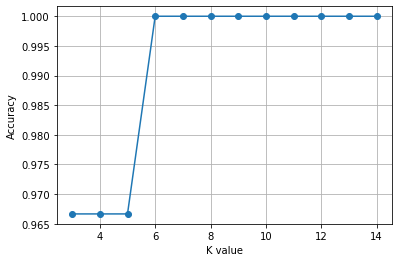

In [88]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid()

In [89]:
classifier=KNeighborsClassifier(n_neighbors=7,metric='euclidean')
classifier.fit(x_train,y_train)
y_pred_knn=classifier.predict(x_test)

In [90]:
accuracy_score(y_test,y_pred_knn)

1.0

In [94]:
print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00



In [40]:
confusion_matrix(y_test,y_pred_knn)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

### SVM Model

In [42]:
from sklearn.svm import SVC
svm_cls=SVC(kernel='linear')
svm_cls.fit(x_train,y_train)
y_pred_svm=svm_cls.predict(x_test)

In [43]:
accuracy_score(y_test,y_pred_svm)

1.0

In [44]:
confusion_matrix(y_test,y_pred_svm)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [96]:
print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00



### RBF Model

In [46]:
svm_cls1=SVC(kernel='rbf')
svm_cls1=svm_cls1.fit(x_train,y_train)
y_pred_svm1=svm_cls1.predict(x_test)

In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [48]:
confusion_matrix(y_test,y_pred_svm1)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [49]:
accuracy_score(y_test,y_pred_svm1)

0.9666666666666667

In [97]:
print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00



### Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt_cls=DecisionTreeClassifier()
dt_cls=dt_cls.fit(x_train,y_train)
y_pred_dt=dt_cls.predict(x_test)

In [52]:
accuracy_score(y_test,y_pred_dt)

1.0

In [101]:
confusion_matrix(y_test,y_pred_dt)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [98]:
print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00



### Random forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf_cls=RandomForestClassifier()
rf_cls=rf_cls.fit(x_train,y_train)
y_pred_rf=rf_cls.predict(x_test)

In [55]:
accuracy_score(y_test,y_pred_rf)

1.0

In [103]:
confusion_matrix(y_test,y_pred_rf)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [104]:
print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00



#### All algorithm except rbf Kernal obtain an accuracy score of 1 and when we compare Precision, Recall or F1 score the value obtained is 1 in all cases. Therefore we can say that its an ideal model.

### Thank You